# 2023-08-30__STA_conntest

(Result of workflow speed (& ergonomy) tests: full Julia (no Python hybrid))

So, for all 10 Ns;\
For 10 diff seeds;
for both exc, inh, and unconn;\
we conntest (maximum) 100 input spike trains.\
(Each test is comprised of calculating 101 STAs: one real and the rest with shuffled ISIs).

From the prev nb (https://tfiers.github.io/phd/nb/2023-08-16__STA_conntest_pyjulia.html),
we found we'd take a shorter window, so that 'area over start' measure (to determine if exc or inh) is correct.

But ok, it's good to show that in thesis.\
So, we repeat an example STA plot here.

for full N ofc.

In [1]:
N = 6500;

In [2]:
@time using Revise

  0.495874 seconds (595.48 k allocations: 36.092 MiB, 1.16% compilation time)


In [3]:
using Nto1AdEx
using Units

In [4]:
duration = 10minutes

600.0

In [19]:
@time sim = Nto1AdEx.sim(N, duration);

  1.972805 seconds (136.45 k allocations: 920.014 MiB, 4.66% gc time, 3.89% compilation time)


(1st run: 2.5 secs, 27% compilation time).

In [6]:
@time using ConnectionTests

  0.079693 seconds (100.47 k allocations: 7.435 MiB)


We want our input spiketrains sorted: the highest spikers first.\
And split exc/inh, too.

In [25]:
using DataFrames

In [37]:
ENV["DATAFRAMES_ROWS"] = 10;

In [45]:
exc_inputs = highest_firing(excitatory_inputs(sim))

tabulate(trains) = DataFrame(
    "# input spikes" => num_spikes.(trains),
    "spike rate (Hz)" => spikerate.(trains)
)
tabulate(exc_inputs)

Row,# input spikes,spike rate (Hz)
,Int64,Float64
1,58522,97.5367
2,35312,58.8533
3,24428,40.7133
4,20653,34.4217
5,18898,31.4967
⋮,⋮,⋮
5196,194,0.323333
5197,185,0.308333
5198,175,0.291667


In [46]:
inh_inputs = highest_firing(inhibitory_inputs(sim))

tabulate(inh_inputs)

Row,# input spikes,spike rate (Hz)
,Int64,Float64
1,21808,36.3467
2,21054,35.09
3,16402,27.3367
4,14905,24.8417
5,14429,24.0483
⋮,⋮,⋮
1296,234,0.39
1297,220,0.366667
1298,218,0.363333


( :) )

In [51]:
STA = calc_STA(sim.V, exc_inputs[1].times);

In [52]:
using WithFeedback

In [55]:
@withfb import PythonCall
@withfb import PythonPlot
@withfb using Sciplotlib
@withfb using PhDPlots

import PythonCall … ✔
import PythonPlot … ✔
using Sciplotlib … ✔
using PhDPlots … ✔


In [57]:
plot = Sciplotlib.plot;

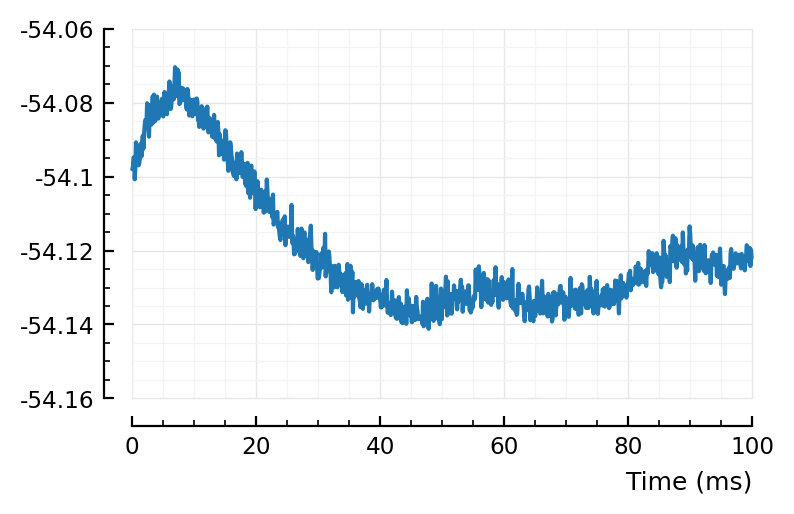

In [61]:
plotsig(STA / mV, ms);

In [67]:
(maximum(STA) - first(STA)) / mV

0.027582126445102606

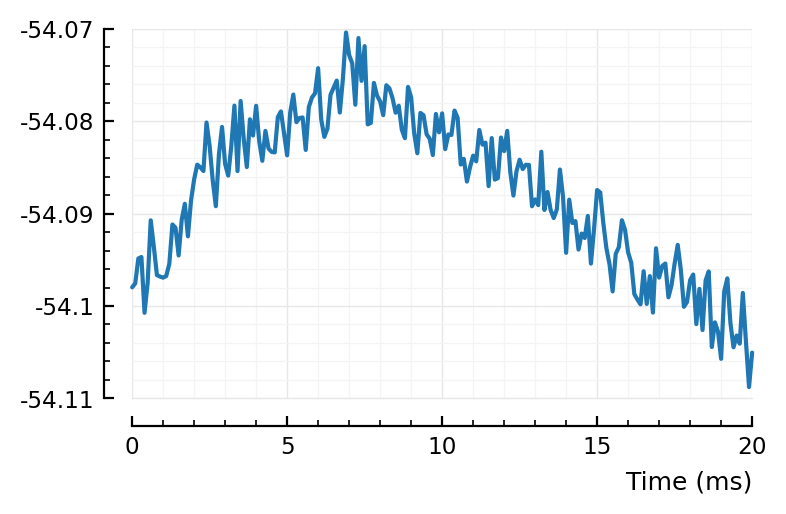

In [69]:
plotsig(STA/mV, [0,20], ms);